## **Simple Linear Regression: Maize Yield Prediction Based on Rainfall**

#### We will take note of the following to achieve the simple linear regression:

* Data Preprocessing
* Splitting Data into Training and Test Sets
* Training the Linear Regression Model
* Making Predictions
* Visualizing the Results
* Evaluating Model Performance

### Import necessary Libraries

In [3]:
# Computation Library
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
jos_df = pd.read_csv('jos_maize_data.csv')

In [5]:
# Check dataset with .head()
jos_df.head()

,Year,Month,Rainfall_mm,Maize_Yield_bags_per_ha
0,2024,April,26.450712,17.650256
1,2022,August,252.715328,26.459804
2,2019,September,193.487699,24.477151
3,2012,March,26.688192,19.483516
4,2022,April,11.957884,17.613674


In [6]:
# Check data information with .info
jos_df.info

<bound method DataFrame.info of       Year      Month  Rainfall_mm  Maize_Yield_bags_per_ha
0     2024      April    26.450712                17.650256
1     2022     August   252.715328                26.459804
2     2019  September   193.487699                24.477151
3     2012      March    26.688192                19.483516
4     2022      April    11.957884                17.613674
...    ...        ...          ...                      ...
9995  2016   November    18.493002                16.237326
9996  2014  September   210.332582                26.528964
9997  2011    January    14.288858                17.537600
9998  2023   December    20.660499                18.139985
9999  2013      March    28.702946                14.892921

[10000 rows x 4 columns]>

In [7]:
# Check null values
jos_df.isnull().sum()

Year                       0
Month                      0
Rainfall_mm                0
Maize_Yield_bags_per_ha    0
dtype: int64

In [8]:
# Show describe
jos_df.describe()

,Year,Rainfall_mm,Maize_Yield_bags_per_ha
count,10000.000000,10000.000000,10000.000000
mean,2017.015400,92.130018,19.871257
std,4.328376,97.096065,4.297845
min,2010.000000,0.000000,8.926592
25%,2013.000000,5.662528,16.244804
50%,2017.000000,40.494016,19.629648
75%,2021.000000,196.595740,23.614079
max,2024.000000,296.666524,31.074819


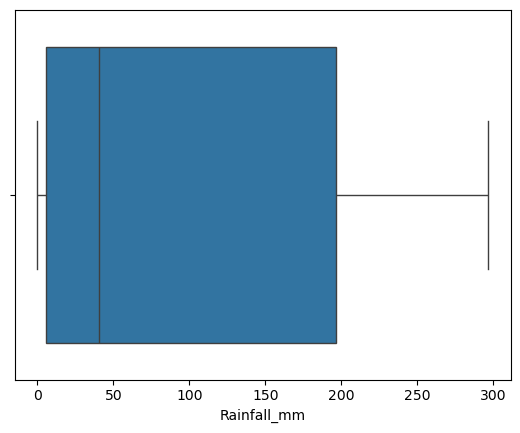

In [9]:
# Visualizing outliers using boxplots
sns.boxplot(x=jos_df['Rainfall_mm'])
plt.show()

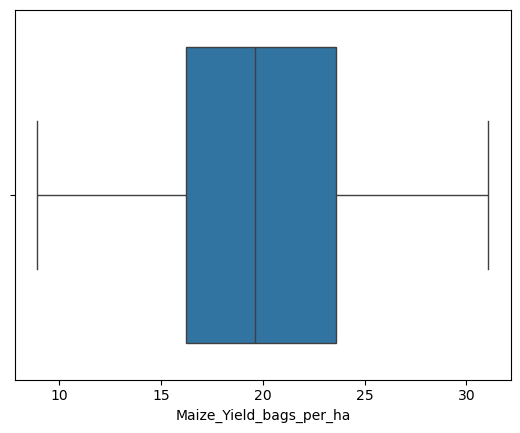

In [10]:
sns.boxplot(x=jos_df['Maize_Yield_bags_per_ha'])
plt.show()

In [31]:
# Skewness check
rainfall_skew = jos_df['Rainfall_mm'].skew()
maize_yield_skew = jos_df['Maize_Yield_bags_per_ha'].skew()

print(f"Rainfall Skewness     : {rainfall_skew:.2f} {'(Right skewed)' if rainfall_skew > 0 else '(Left skewed)' if rainfall_skew < 0 else '(Symmetrical)'}")
print(f"Maize Yield Skewness : {maize_yield_skew:.2f} {'(Right skewed)' if maize_yield_skew > 0 else '(Left skewed)' if maize_yield_skew < 0 else '(Symmetrical)'}")


Rainfall Skewness     : 0.58 (Right skewed)
Maize Yield Skewness : 0.05 (Right skewed)


## **Exploratory Data Analysis**
Creating a scatter plot with a regression line to visualize the relationship between 'rainfall' and 'maize_yield' and Calculate the Pearson correlation coefficient and interpret its value in the context of the relationship

In [11]:
jos_df.head(2)

,Year,Month,Rainfall_mm,Maize_Yield_bags_per_ha
0,2024,April,26.450712,17.650256
1,2022,August,252.715328,26.459804


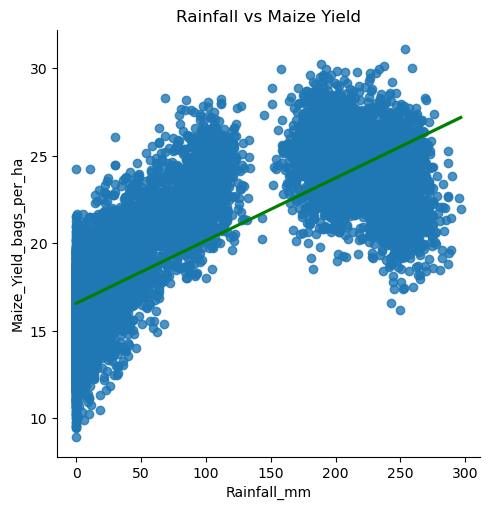

In [12]:
# Scatter plot with regression line
sns.lmplot(x='Rainfall_mm', y='Maize_Yield_bags_per_ha', data=jos_df, line_kws={'color': 'green'})
plt.title('Rainfall vs Maize Yield')
plt.show()



In [13]:
# Calculate Pearson correlation coefficient
correlation = jos_df['Rainfall_mm'].corr(jos_df['Maize_Yield_bags_per_ha'])
print(f'Pearson Correlation Coefficient: {correlation}')

# Interpretation
# If the coefficient is close to +1 or -1, it suggests a strong linear relationship.
# Positive correlation means as rainfall increases, maize yield increases.

Pearson Correlation Coefficient: 0.8078937459224244


## **Model Building**
Implementing a simple linear regression using scikit-learn to predict 'maize_yield' based on 'rainfall'. Provide the model equation, coefficients, and their standard errors.

##### Splitting the Dataset into Training and Test Sets¶
Splitting ensures we train our model on one part of the data and test it on another part.

In [14]:
# Import libraries
from sklearn.linear_model import LinearRegression # Regreesor
from sklearn.model_selection import train_test_split # data spliting
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.linear_model import LinearRegression # model training
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation

In [18]:
jos_df.head(2)

,Year,Month,Rainfall_mm,Maize_Yield_bags_per_ha
0,2024,April,26.450712,17.650256
1,2022,August,252.715328,26.459804


In [16]:
# Prepare data for regression
X = jos_df[['Rainfall_mm']]  # Feature
y = jos_df['Maize_Yield_bags_per_ha']  # Target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=777)

### **Feature Scaling**
Feature scaling helps normalize data for better model performance.
- It is not necessary for simple linear regression, but we include it for teaching purposes.

In [19]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **Training the Simple Linear Regression Model**
We use the LinearRegression class from sklearn to train the model.

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### **Making Predictions**
The trained model is used to predict salaries for the test set.

In [21]:
y_pred = regressor.predict(X_test)

### **Visualizing the Training Set Results**
A scatter plot helps us understand the actual data points, and the regression line shows the model’s prediction.

In [23]:
jos_df.head(2)

,Year,Month,Rainfall_mm,Maize_Yield_bags_per_ha
0,2024,April,26.450712,17.650256
1,2022,August,252.715328,26.459804


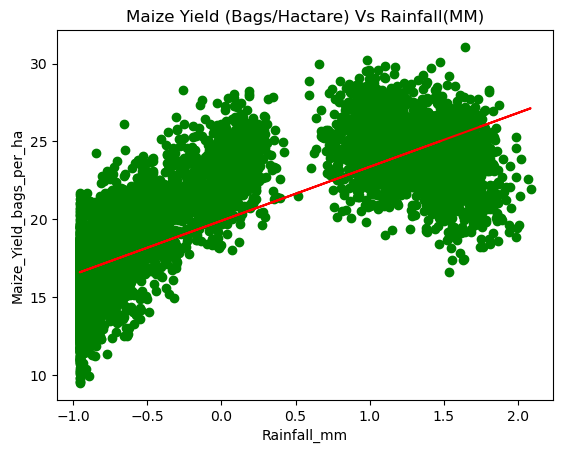

In [28]:
plt.scatter(X_train, y_train, color='green')  # Actual salaries
plt.plot(X_train, regressor.predict(X_train), color='red')  # Regression line
plt.title('Maize Yield (Bags/Hactare) Vs Rainfall(MM)')
plt.xlabel('Rainfall_mm')
plt.ylabel('Maize_Yield_bags_per_ha')
plt.show()

### **Visualizing the Test Set Results**
The same approach is used to compare actual vs predicted Maize Yields(Bags/Hactare) in the test set.

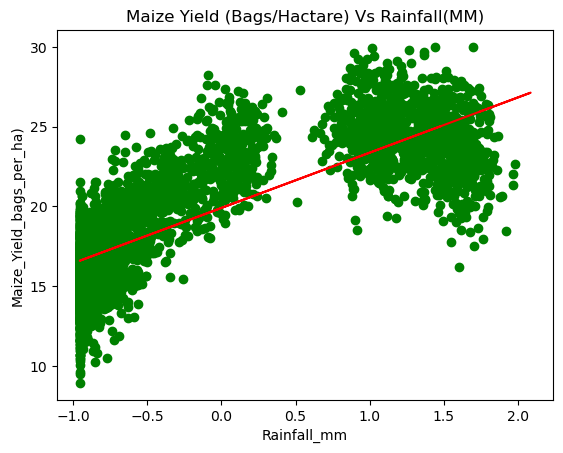

In [29]:
plt.scatter(X_test, y_test, color='green')  # Actual salaries
plt.plot(X_train, regressor.predict(X_train), color='red')  # Regression line
plt.title('Maize Yield (Bags/Hactare) Vs Rainfall(MM)')
plt.xlabel('Rainfall_mm')
plt.ylabel('Maize_Yield_bags_per_ha)')
plt.show()

## **Scatterplot description**
The scatter plot shows a positive relationship between rainfall and maize yield, with the regression line indicating that higher rainfall generally leads to higher yields. However, the data points form two visible clusters, suggesting other hidden factors may be influencing yield. While the linear model captures the overall trend, it doesn't fully explain the variation, pointing to potential improvements using more advanced modeling.

## **Model Evaluation**
Evaluating the model's performance using R^2, MAE, and MSE to assess how well our model performs

In [26]:
mae = mean_absolute_error(y_test, y_pred)  # Measures absolute difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)  # Measures the squared difference (penalizes large errors more)
r2 = r2_score(y_test, y_pred)  # Meausres how well the model explains the variability in maize yield.

# Printing performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

# Discussion:
# - MAE and MSE provide insights into prediction accuracy. Lower values are better.

Mean Absolute Error (MAE): 2.0057886900897364
Mean Squared Error (MSE): 6.294904871920549
R-squared Score (R²): 0.6578682082630284




### **Model Overview**
The goal of this model is to predict **Maize Yield (bags/ha)** based on **Rainfall (mm)**. We implemented a simple linear regression model to capture the relationship between these two variables.

### Model Performance
- **Pearson Correlation Coefficient**: **0.808**  
  There is a strong positive linear relationship between **rainfall** and **maize yield**, though it's not perfect.
  
- **Mean Absolute Error (MAE)**: **2.01 bags/ha**  
  On average, the model's predictions are off by about 2 bags per hectare.

- **Mean Squared Error (MSE)**: **6.29**  
  The MSE indicates moderate error, with larger errors being penalized more heavily.

- **R-squared (R²)**: **0.658**  
  About **65.8%** of the variance in maize yield is explained by rainfall, suggesting there are additional factors influencing yield not captured by this model.

### Conclusion
The simple linear regression model provides a decent starting point for predicting **maize yield** based on **rainfall**. While the model explains a good portion of the variance, there is room for improvement. Adding additional features such as **month**, **year**, and other potential factors like **soil type** and **temperature** could enhance prediction accuracy.

### Next Steps
- **Feature Engineering**: Add seasonal features (e.g., **month**, **year**).
- **Model Improvement**: Explore **polynomial regression** or other advanced models (e.g., **random forests**).
- **Validation**: Test the model on a validation or test set to check generalization.
